# Payment Date Prediction 


### Importing related Libraries 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

/opt/conda/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Store the dataset into the Dataframe


In [2]:
df = pd.read_csv(r"./h2h_assignment_dataset.csv")

### Check the shape of the dataframe


In [3]:
df.shape

(50000, 19)

### Check the Detail information of the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [5]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [6]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [7]:
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.012% null

In [8]:
df.isnull().mean().mul(100).sort_values(ascending=False)

area_business             100.000
clear_date                 20.000
invoice_id                  0.012
business_code               0.000
invoice_currency            0.000
cust_payment_terms          0.000
baseline_create_date        0.000
total_open_amount           0.000
posting_id                  0.000
document type               0.000
due_in_date                 0.000
cust_number                 0.000
document_create_date.1      0.000
document_create_date        0.000
posting_date                0.000
doc_id                      0.000
buisness_year               0.000
name_customer               0.000
isOpen                      0.000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [9]:
df.loc[:, ["doc_id", "invoice_id"]]

,doc_id,invoice_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [10]:
df.groupby(
    ["baseline_create_date", "document_create_date", "document_create_date.1"]
).size()

baseline_create_date  document_create_date  document_create_date.1
20181214.0            20190108              20190108                   1
                      20190201              20190201                   1
20181230.0            20181226              20181230                   1
                      20181228              20181230                   1
                      20181229              20181230                  44
                                                                      ..
20200515.0            20200515              20200515                   1
20200517.0            20200513              20200517                   1
20200518.0            20200516              20200518                   1
20200519.0            20200519              20200519                   1
20200522.0            20200522              20200522                   1
Length: 5852, dtype: int64

#### Please check, Column 'posting_id' is constant columns or not


In [11]:
df.columns[df.nunique() <= 1]  # Constant columns

Index(['posting_id', 'area_business'], dtype='object')

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [12]:
df.columns[df.nunique() <= 1]  # Constant columns

Index(['posting_id', 'area_business'], dtype='object')

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [13]:
df.drop(
    columns=[
        "area_business",
        "posting_id",
        "invoice_id",
        "document_create_date",
        "isOpen",
        "document type",
        "document_create_date.1",
    ],
    axis=1,
    inplace=True,
)

### Please check from the dataframe whether all the columns are removed or not 

In [14]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

### Show all the Dublicate rows from the dataframe

In [15]:
df[df.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8


### Display the Number of Dublicate Rows

In [16]:
df.duplicated().shape[0]

50000

### Drop all the Dublicate Rows

In [17]:
df.drop_duplicates(inplace=True)

#### Now check for all dublicate rows now

- Note - It must be 0 by now

In [18]:
df[df.duplicated()]  # It is 0 indeed, all duplicate rows have been dropped

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms


### Check for the number of Rows and Columns in your dataset

In [19]:
df.shape[0]

48839

### Find out the total count of null values in each columns

In [20]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

# Data type Conversion

### Please check the data type of each column of the dataframe

In [21]:
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [22]:
df.loc[
    :, ["clear_date", "posting_date", "due_in_date", "baseline_create_date"]
].dtypes

clear_date               object
posting_date             object
due_in_date             float64
baseline_create_date    float64
dtype: object

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [23]:
dt_lis = ["baseline_create_date", "due_in_date", "clear_date", "posting_date"]
df[dt_lis[0]], df[dt_lis[1]] = df[dt_lis[0]].astype("int"), df[
    dt_lis[1]
].astype("int")

In [24]:
df[dt_lis[0]], df[dt_lis[1]] = (
    pd.to_datetime(df[dt_lis[0]], format="%Y%m%d").dt.date,
    pd.to_datetime(df[dt_lis[1]], format="%Y%m%d").dt.date,
)

In [25]:
df[dt_lis[2]], df[dt_lis[3]] = (
    pd.to_datetime(df[dt_lis[2]], format="%Y-%m-%d").dt.date,
    pd.to_datetime(df[dt_lis[3]], format="%Y-%m-%d").dt.date,
)

In [26]:
df.loc[:, dt_lis]

,baseline_create_date,due_in_date,clear_date,posting_date
0,2020-01-26,2020-02-10,2020-02-11,2020-01-26
1,2019-07-22,2019-08-11,2019-08-08,2019-07-22
2,2019-09-14,2019-09-29,2019-12-30,2019-09-14
3,2020-03-31,2020-04-10,NaT,2020-03-30
4,2019-11-13,2019-11-28,2019-11-25,2019-11-13
...,...,...,...,...
49995,2020-04-21,2020-05-06,NaT,2020-04-21
49996,2019-08-15,2019-08-30,2019-09-03,2019-08-15
49997,2020-02-19,2020-03-05,2020-03-05,2020-02-19
49998,2019-11-27,2019-12-12,2019-12-12,2019-11-27


### Please check the datatype of all the columns after conversion of the above 4 columns

In [27]:
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date              object
invoice_currency         object
total_open_amount       float64
baseline_create_date     object
cust_payment_terms       object
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [28]:
df["invoice_currency"].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [29]:
df["total_open_amount"]

0        54273.28
1        79656.60
2         2253.86
3         3299.70
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: total_open_amount, Length: 48839, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [30]:
df["converted_usd"] = np.where(
    (df["invoice_currency"] == "CAD"),
    df["total_open_amount"] * 0.7,
    df["total_open_amount"],
)

### Display the new "converted_usd" column values

In [31]:
df.loc[
    0:9,
    [
        "invoice_currency",
        "total_open_amount",
        "converted_usd",
    ],
]

,invoice_currency,total_open_amount,converted_usd
0,USD,54273.28,54273.280
1,USD,79656.60,79656.600
2,USD,2253.86,2253.860
3,CAD,3299.70,2309.790
4,USD,33133.29,33133.290
5,CAD,22225.84,15558.088
6,USD,7358.49,7358.490
7,USD,11173.02,11173.020
8,USD,15995.04,15995.040
9,USD,28.63,28.630


### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [32]:
df["buisness_year"].value_counts()

2019.0    33975
2020.0    14864
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [33]:
df.drop(columns=["invoice_currency", "total_open_amount"], axis=1, inplace=True)

### Write a code to check the number of columns in dataframe

In [34]:
df.shape[1]

11

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [35]:
null_columns = df.columns[df.isna().any()].tolist()
null_columns

['clear_date']

#### Find out the number of null values from the column that you got from the above code

In [36]:
df[null_columns].isna().sum()  # 9681 rows of null

clear_date    9681
dtype: int64

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Not Null data in that column ( This is going to be our test dataset ) 

In [37]:
filter = df[null_columns[0]].isna()
maindata = df[filter]
nulldata = df[~filter]

### Check the number of Rows and Columns for both the dataframes 

In [38]:
maindata.shape

(9681, 11)

In [39]:
nulldata.shape

(39158, 11)

### Display the 5 records from maindata and nulldata dataframes

In [40]:
maindata.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


In [41]:
nulldata.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [42]:
df["Delay"] = df["clear_date"] - df["due_in_date"]

df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.28,1 days
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.60,-3 days
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.86,92 days
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,NaT
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.29,-3 days
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaT,2020.0,1.930797e+09,2020-04-21,2020-05-06,2020-04-21,NAA8,3187.86,NaT
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.54,4 days
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.86,0 days
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.48,0 days


### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [43]:
df["avgdelay"] = df.groupby("name_customer")["Delay"].transform("mean")

df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avgdelay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.28,1 days,-3 days +07:08:49.779837776
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.60,-3 days,19 days 00:00:00
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.86,92 days,8 days 02:10:54.545454545
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,NaT,2 days 19:03:31.764705882
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.29,-3 days,-3 days +19:33:27.692307693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaT,2020.0,1.930797e+09,2020-04-21,2020-05-06,2020-04-21,NAA8,3187.86,NaT,-1 days +17:08:34.285714286
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.54,4 days,-3 days +12:40:08.540925267
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.86,0 days,1 days 01:08:34.285714285
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.48,0 days,1 days 13:36:42.985074626


You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [44]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avgdelay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.28,1 days,-3 days +07:08:49.779837776
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.60,-3 days,19 days 00:00:00
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.86,92 days,8 days 02:10:54.545454545
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,NaT,2 days 19:03:31.764705882
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.29,-3 days,-3 days +19:33:27.692307693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaT,2020.0,1.930797e+09,2020-04-21,2020-05-06,2020-04-21,NAA8,3187.86,NaT,-1 days +17:08:34.285714286
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.54,4 days,-3 days +12:40:08.540925267
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.86,0 days,1 days 01:08:34.285714285
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.48,0 days,1 days 13:36:42.985074626


### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [45]:
df["avgdelay"] = df["avgdelay"].dt.total_seconds()

### Display the maindata dataframe 

In [46]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avgdelay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.28,1 days,-2.334702e+05
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.60,-3 days,1.641600e+06
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.86,92 days,6.990545e+05
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,NaT,2.414118e+05
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.29,-3 days,-1.887923e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaT,2020.0,1.930797e+09,2020-04-21,2020-05-06,2020-04-21,NAA8,3187.86,NaT,-2.468571e+04
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.54,4 days,-2.135915e+05
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.86,0 days,9.051429e+04
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.48,0 days,1.354030e+05


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [47]:
df.drop(columns=["Delay", "clear_date"], inplace=True)

df

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avgdelay
0,U001,0200769623,WAL-MAR corp,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.28,-2.334702e+05
1,U001,0200980828,BEN E,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.60,1.641600e+06
2,U001,0200792734,MDV/ trust,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.86,6.990545e+05
3,CA02,0140105686,SYSC llc,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,2.414118e+05
4,U001,0200769623,WAL-MAR foundation,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.29,-1.887923e+05
...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,2020.0,1.930797e+09,2020-04-21,2020-05-06,2020-04-21,NAA8,3187.86,-2.468571e+04
49996,U001,0200769623,WAL-MAR co,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.54,-2.135915e+05
49997,U001,0200772595,SAFEW associates,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.86,9.051429e+04
49998,U001,0200726979,BJ'S llc,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.48,1.354030e+05


# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [48]:
df = df.dropna()

In [49]:
X_train, X_loc_test, y_train, y_local_test = train_test_split(
    df, df["avgdelay"], train_size=0.60
)

In [50]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avgdelay
3185,U001,0200769623,WAL-MAR trust,2020.0,1.930534e+09,2020-02-17,2020-03-03,2020-02-17,NAH4,3227.43,-200192.833876
9757,U001,0200769623,WAL-MAR systems,2020.0,1.930751e+09,2020-04-05,2020-04-20,2020-04-05,NAH4,33101.38,-205321.957340
37839,U001,0100049207,JET trust,2019.0,1.929725e+09,2019-08-13,2019-08-28,2019-08-13,NAA8,10099.59,205200.000000
16986,U001,0200769623,WAL-MAR in,2019.0,1.930200e+09,2019-11-27,2019-12-12,2019-11-27,NAH4,65529.92,-217708.474576
49627,U002,0200806643,PLAZA WA associates,2019.0,1.990566e+09,2019-05-06,2019-06-10,2019-05-06,NAG2,872.40,864000.000000
...,...,...,...,...,...,...,...,...,...,...,...
20490,U001,0200778870,C co,2019.0,1.928833e+09,2019-02-21,2019-03-08,2019-02-21,NAA8,14200.28,535680.000000
24677,U001,0200936373,SUPE us,2019.0,1.929941e+09,2019-10-01,2019-10-16,2019-10-01,NAA8,76234.16,261818.181818
43901,U001,0200707822,PUBLI llc,2019.0,1.929797e+09,2019-08-27,2019-09-11,2019-08-27,NAA8,128128.52,79077.966102
37395,U001,0200776463,KROGE,2019.0,1.930250e+09,2019-12-09,2019-12-24,2019-12-09,NAA8,149923.50,122400.000000


#### You are expected to split both the dataframes into train and test format in 60:40 ratio

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [51]:
X_train.shape, X_loc_test.shape, y_train.shape, y_local_test.shape

((29103, 11), (19403, 11), (29103,), (19403,))

### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [52]:
X_val, X_test, y_val, y_test = train_test_split(
    X_loc_test, y_local_test, train_size=0.5
)

In [53]:
X_train["avgdelay"] = X_train["avgdelay"].fillna(0)
X_test["avgdelay"] = X_test["avgdelay"].fillna(0)
X_val["avgdelay"] = X_val["avgdelay"].fillna(0)

### Please check for the number of rows and columns of all the 4 dataframes 

In [54]:
X_val.shape, X_test.shape, y_val.shape, y_test.shape

((9701, 11), (9702, 11), (9701,), (9702,))

# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

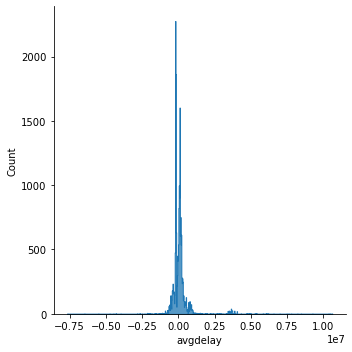

In [55]:
sns.displot(y_local_test, element="step")
plt.show()

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [56]:
x_train = X_train.groupby(by=["name_customer"], as_index=False)[
    "doc_id"
].count()

x_train

,name_customer,doc_id
0,99 CE,3
1,99 CE associates,1
2,99 CE corporation,1
3,99 CE foundation,2
4,99 CE in,1
...,...,...
3194,YEN BROS corp,1
3195,YEN BROS corporation,1
3196,YEN BROS llc,1
3197,ZARCO co,1


### You can make another distribution plot of the "doc_id" column from x_train

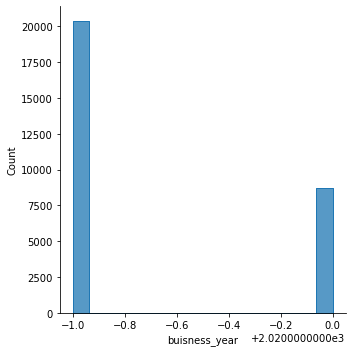

In [57]:
sns.displot(X_train["buisness_year"], element="step")
plt.show()

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


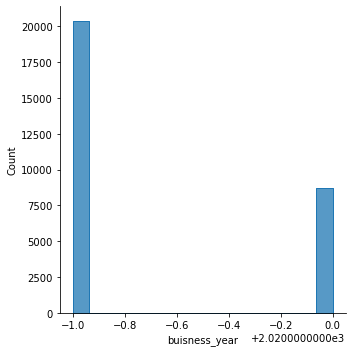

In [58]:
sns.displot(X_train["buisness_year"], element="step")
plt.show()

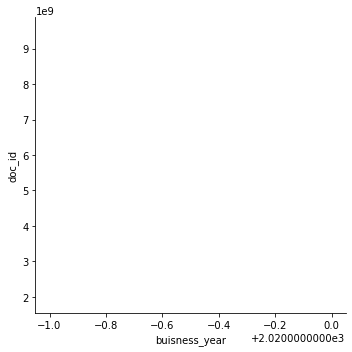

In [59]:
sns.displot(x=X_train["buisness_year"], y=X_train["doc_id"])
plt.show()

# Feature Engineering 

### Display and describe the X_train dataframe 

In [60]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avgdelay
3185,U001,0200769623,WAL-MAR trust,2020.0,1.930534e+09,2020-02-17,2020-03-03,2020-02-17,NAH4,3227.43,-200192.833876
9757,U001,0200769623,WAL-MAR systems,2020.0,1.930751e+09,2020-04-05,2020-04-20,2020-04-05,NAH4,33101.38,-205321.957340
37839,U001,0100049207,JET trust,2019.0,1.929725e+09,2019-08-13,2019-08-28,2019-08-13,NAA8,10099.59,205200.000000
16986,U001,0200769623,WAL-MAR in,2019.0,1.930200e+09,2019-11-27,2019-12-12,2019-11-27,NAH4,65529.92,-217708.474576
49627,U002,0200806643,PLAZA WA associates,2019.0,1.990566e+09,2019-05-06,2019-06-10,2019-05-06,NAG2,872.40,864000.000000
...,...,...,...,...,...,...,...,...,...,...,...
20490,U001,0200778870,C co,2019.0,1.928833e+09,2019-02-21,2019-03-08,2019-02-21,NAA8,14200.28,535680.000000
24677,U001,0200936373,SUPE us,2019.0,1.929941e+09,2019-10-01,2019-10-16,2019-10-01,NAA8,76234.16,261818.181818
43901,U001,0200707822,PUBLI llc,2019.0,1.929797e+09,2019-08-27,2019-09-11,2019-08-27,NAA8,128128.52,79077.966102
37395,U001,0200776463,KROGE,2019.0,1.930250e+09,2019-12-09,2019-12-24,2019-12-09,NAA8,149923.50,122400.000000


In [61]:
X_train.describe()

,buisness_year,doc_id,converted_usd,avgdelay
count,29103.000000,2.910300e+04,29103.000000,2.910300e+04
mean,2019.300003,2.012867e+09,31012.058117,5.896023e+04
std,0.458267,2.880881e+08,36220.312352,6.349761e+05
min,2019.000000,1.928502e+09,0.790000,-6.825600e+06
25%,2019.000000,1.929339e+09,4757.458000,-2.053220e+05
50%,2019.000000,1.929956e+09,17173.760000,1.345574e+04
75%,2020.000000,1.930606e+09,46167.135000,1.360000e+05
max,2020.000000,9.500000e+09,668593.360000,1.036800e+07


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [62]:
business_coder = LabelEncoder()
business_coder.fit(X_train["business_code"])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [63]:
X_train["business_code_enc"] = business_coder.fit_transform(
    X_train["business_code"]
)

In [64]:
X_val["business_code_enc"] = business_coder.transform(X_val["business_code"])
X_test["business_code_enc"] = business_coder.transform(X_test["business_code"])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [65]:
X_train.loc[:, ["business_code", "business_code_enc"]]

,business_code,business_code_enc
3185,U001,1
9757,U001,1
37839,U001,1
16986,U001,1
49627,U002,2
...,...,...
20490,U001,1
24677,U001,1
43901,U001,1
37395,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [66]:
def custom(col, traindf=X_train, valdf=X_val, testdf=X_test):
    traindf.drop(col, axis=1, inplace=True)
    valdf.drop(col, axis=1, inplace=True)
    testdf.drop(col, axis=1, inplace=True)

    return traindf, valdf, testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [67]:
X_train, X_val, X_test = custom(["business_code"])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [68]:
X_train["cust_number"] = (
    X_train["cust_number"]
    .str.replace("CCCA", "1")
    .str.replace("CCU", "2")
    .str.replace("CC", "3")
    .astype(int)
)
X_test["cust_number"] = (
    X_test["cust_number"]
    .str.replace("CCCA", "1")
    .str.replace("CCU", "2")
    .str.replace("CC", "3")
    .astype(int)
)
X_val["cust_number"] = (
    X_val["cust_number"]
    .str.replace("CCCA", "1")
    .str.replace("CCU", "2")
    .str.replace("CC", "3")
    .astype(int)
)

#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [69]:
# For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()

    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(
            list(data_list) + ["Unknown"]
        )
        self.classes_ = self.label_encoder.classes_
        return self

    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = [
                    "Unknown" if x == unique_item else x for x in new_data_list
                ]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [70]:
label_encoder = EncoderExt()
label_encoder.fit(X_train["name_customer"])
X_train["name_customer_enc"] = label_encoder.transform(X_train["name_customer"])
X_val["name_customer_enc"] = label_encoder.transform(X_val["name_customer"])
X_test["name_customer_enc"] = label_encoder.transform(X_test["name_customer"])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [71]:
X_train, X_val, X_test = custom(["name_customer"])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [72]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train["cust_payment_terms"])
X_train["cust_payment_terms_enc"] = label_encoder1.transform(
    X_train["cust_payment_terms"]
)
X_val["cust_payment_terms_enc"] = label_encoder1.transform(
    X_val["cust_payment_terms"]
)
X_test["cust_payment_terms_enc"] = label_encoder1.transform(
    X_test["cust_payment_terms"]
)

In [73]:
X_train, X_val, X_test = custom(["cust_payment_terms"])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [74]:
X_train.dtypes

cust_number                 int64
buisness_year             float64
doc_id                    float64
posting_date               object
due_in_date                object
baseline_create_date       object
converted_usd             float64
avgdelay                  float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
dtype: object

In [75]:
X_val.dtypes

cust_number                 int64
buisness_year             float64
doc_id                    float64
posting_date               object
due_in_date                object
baseline_create_date       object
converted_usd             float64
avgdelay                  float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
dtype: object

In [76]:
X_test.dtypes

cust_number                 int64
buisness_year             float64
doc_id                    float64
posting_date               object
due_in_date                object
baseline_create_date       object
converted_usd             float64
avgdelay                  float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [77]:
X_train["day_of_postingdate"] = pd.to_datetime(
    X_train["posting_date"], format="%Y-%m-%d"
).dt.day
X_train["month_of_postingdate"] = pd.to_datetime(
    X_train["posting_date"], format="%Y-%m-%d"
).dt.month
X_train["year_of_postingdate"] = pd.to_datetime(
    X_train["posting_date"], format="%Y-%m-%d"
).dt.year

X_val["day_of_postingdate"] = pd.to_datetime(
    X_val["posting_date"], format="%Y-%m-%d"
).dt.day
X_val["month_of_postingdate"] = pd.to_datetime(
    X_val["posting_date"], format="%Y-%m-%d"
).dt.month
X_val["year_of_postingdate"] = pd.to_datetime(
    X_val["posting_date"], format="%Y-%m-%d"
).dt.year

X_test["day_of_postingdate"] = pd.to_datetime(
    X_test["posting_date"], format="%Y-%m-%d"
).dt.day
X_test["month_of_postingdate"] = pd.to_datetime(
    X_test["posting_date"], format="%Y-%m-%d"
).dt.month
X_test["year_of_postingdate"] = pd.to_datetime(
    X_test["posting_date"], format="%Y-%m-%d"
).dt.year

### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [78]:
X_train, X_val, X_test = custom(["posting_date"])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [79]:
X_train["day_of_baselinecreatedate"] = pd.to_datetime(
    X_train["baseline_create_date"], format="%Y-%m-%d"
).dt.day
X_train["month_of_baselinecreatedate"] = pd.to_datetime(
    X_train["baseline_create_date"], format="%Y-%m-%d"
).dt.month
X_train["year_of_baselinecreatedate"] = pd.to_datetime(
    X_train["baseline_create_date"], format="%Y-%m-%d"
).dt.year

X_val["day_of_baselinecreatedate"] = pd.to_datetime(
    X_val["baseline_create_date"], format="%Y-%m-%d"
).dt.day
X_val["month_of_baselinecreatedate"] = pd.to_datetime(
    X_val["baseline_create_date"], format="%Y-%m-%d"
).dt.month
X_val["year_of_baselinecreatedate"] = pd.to_datetime(
    X_val["baseline_create_date"], format="%Y-%m-%d"
).dt.year

X_test["day_of_baselinecreatedate"] = pd.to_datetime(
    X_test["baseline_create_date"], format="%Y-%m-%d"
).dt.day
X_test["month_of_baselinecreatedate"] = pd.to_datetime(
    X_test["baseline_create_date"], format="%Y-%m-%d"
).dt.month
X_test["year_of_baselinecreatedate"] = pd.to_datetime(
    X_test["baseline_create_date"], format="%Y-%m-%d"
).dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [80]:
X_train, X_val, X_test = custom(["baseline_create_date"])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [81]:
X_train["day_of_dueindate"] = pd.to_datetime(
    X_train["due_in_date"], format="%Y-%m-%d"
).dt.day
X_train["month_of_dueindate"] = pd.to_datetime(
    X_train["due_in_date"], format="%Y-%m-%d"
).dt.month
X_train["year_of_dueindate"] = pd.to_datetime(
    X_train["due_in_date"], format="%Y-%m-%d"
).dt.year

X_val["day_of_dueindate"] = pd.to_datetime(
    X_val["due_in_date"], format="%Y-%m-%d"
).dt.day
X_val["month_of_dueindate"] = pd.to_datetime(
    X_val["due_in_date"], format="%Y-%m-%d"
).dt.month
X_val["year_of_dueindate"] = pd.to_datetime(
    X_val["due_in_date"], format="%Y-%m-%d"
).dt.year

X_test["day_of_dueindate"] = pd.to_datetime(
    X_test["due_in_date"], format="%Y-%m-%d"
).dt.day
X_test["month_of_dueindate"] = pd.to_datetime(
    X_test["due_in_date"], format="%Y-%m-%d"
).dt.month
X_test["year_of_dueindate"] = pd.to_datetime(
    X_test["due_in_date"], format="%Y-%m-%d"
).dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [82]:
X_train, X_val, X_test = custom(["due_in_date"])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [83]:
pd.DataFrame([X_train.dtypes, X_val.dtypes, X_test.dtypes])

,cust_number,buisness_year,doc_id,converted_usd,avgdelay,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_baselinecreatedate,month_of_baselinecreatedate,year_of_baselinecreatedate,day_of_dueindate,month_of_dueindate,year_of_dueindate
0,int64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
1,int64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
2,int64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64


# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [84]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

17

- Note - Keep the code as it is, no need to change 


In [85]:
constant_columns = [
    column
    for column in X_train.columns
    if column not in X_train.columns[constant_filter.get_support()]
]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [86]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [87]:
def handling_correlation(X_train, threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [88]:
train = X_train.copy()
handling_correlation(train.copy(), 0.85)

['month_of_dueindate',
 'year_of_baselinecreatedate',
 'month_of_baselinecreatedate',
 'day_of_baselinecreatedate',
 'year_of_dueindate',
 'year_of_postingdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

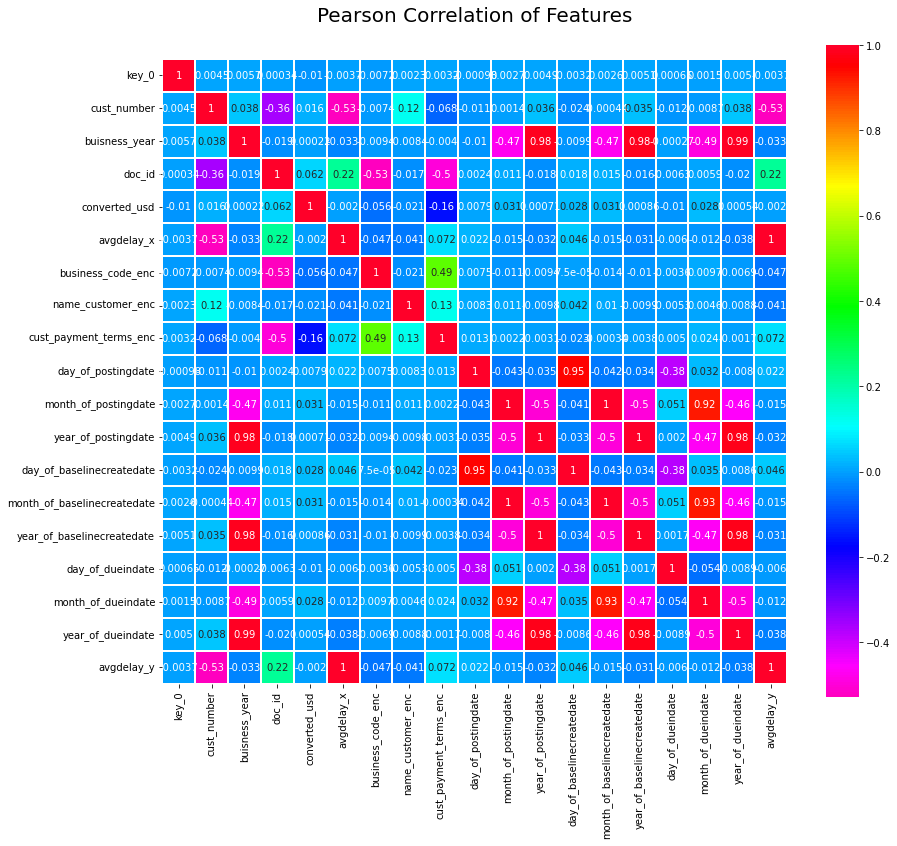

In [89]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title("Pearson Correlation of Features", y=1.05, size=20)
sns.heatmap(
    X_train.merge(y_train, on=X_train.index).corr(),
    linewidths=0.1,
    vmax=1.0,
    square=True,
    cmap="gist_rainbow_r",
    linecolor="white",
    annot=True,
)

plt.show()

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [90]:
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [91]:
sel.variances_

array([1.64571835e+15, 2.10001374e-01, 8.29918806e+16, 1.31186595e+09,
       4.03180735e+11, 2.53753546e-01, 1.16917604e+06, 1.26205580e+02,
       7.72602234e+01, 1.07534336e+01, 2.12565610e-01, 7.88623154e+01,
       1.07601531e+01, 2.12705383e-01, 7.48730551e+01, 1.05640893e+01,
       2.11368228e-01])

### Important features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [92]:
MSE_Score = []
R2_Score = []
Algorithm = []

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [93]:
X_train.isna().any()

cust_number                    False
buisness_year                  False
doc_id                         False
converted_usd                  False
avgdelay                       False
business_code_enc              False
name_customer_enc              False
cust_payment_terms_enc         False
day_of_postingdate             False
month_of_postingdate           False
year_of_postingdate            False
day_of_baselinecreatedate      False
month_of_baselinecreatedate    False
year_of_baselinecreatedate     False
day_of_dueindate               False
month_of_dueindate             False
year_of_dueindate              False
dtype: bool

### Fix NaN by dropping and resizing the X_train

In [94]:
# X_train = X_train.dropna()
# y_train = y_train.dropna()
# y_test = y_test.dropna()

In [95]:
Algorithm.append("LinearRegression")
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [96]:
predicted

array([3697200.00000004,  110817.39130434,   90514.28571428, ...,
       -213591.45907474,  204631.57894737,   17280.        ])

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [97]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [98]:
predict_test = regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

8.809701851333519e-09

### Display The Comparison Lists

In [99]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=",")

['LinearRegression'],[8.330193232694248e-17],[1.0],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [100]:
Algorithm.append("SVR")
regressor = SVR()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [101]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [102]:
predict_test = regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

642756.7500021239

### Display The Comparison Lists

In [103]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=", ")

['LinearRegression', 'SVR'], [8.330193232694248e-17, 408646110416.5036], [1.0, -0.0046349289188640785], 

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [104]:
Algorithm.append("DecisionTreeRegressor")
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [105]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [106]:
predict_test = regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

17129.34047721438

### Display The Comparison Lists

In [107]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=", ")

['LinearRegression', 'SVR', 'DecisionTreeRegressor'], [8.330193232694248e-17, 408646110416.5036, 352747076.5833688], [1.0, -0.0046349289188640785, 0.9991327899001694], 

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
Algorithm.append("RandomForestRegressor")
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [ ]:
predict_test = regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

### Display The Comparison Lists


In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=", ")

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [ ]:
Algorithm.append("XGB Regressor")
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [ ]:
predict_test = regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

### Display The Comparison Lists


In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=", ")

## You need to make the comparison list into a comparison dataframe 

In [ ]:
pd.DataFrame([Algorithm, MSE_Score, R2_Score])

## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [ ]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [ ]:
mean_squared_error(y_test, predictedfinal, squared=False)

### Calculate the mean Square Error for validation dataset

In [ ]:
mean_squared_error(y_val, predict_testfinal, squared=False)

### Calculate the R2 score for test

In [ ]:
r2_score(y_test, predictedfinal)

### Calculate the R2 score for Validation

In [ ]:
r2_score(y_val, predict_testfinal)

### Calculate the Accuracy for train Dataset 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Choosing RandomForestRegressor because it performs good with floating point numbers.

clf = RandomForestRegressor()
trained_model = clf.fit(X_train, y_train)
trained_model.fit(X_train, y_train)
predictions = trained_model.predict(X_test)

In [ ]:
clf.score(X_train, y_train)

### Calculate the accuracy for validation

In [ ]:
clf.score(X_val, y_val)

### Calculate the accuracy for test

In [ ]:
clf.score(X_test, y_test)

## Specify the reason behind choosing your machine learning model 

- Note : Choosing RandomForestRegressor because it **performs good with floating point numbers.**

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [ ]:
nulldata

### Check for the number of rows and columns in the nulldata

In [ ]:
pd.DataFrame(nulldata.shape, index=["Rows", "Columns"])

### Check the Description and Information of the nulldata 

In [ ]:
nulldata.describe()

### Storing the Nulldata into a different dataset 
# for BACKUP

In [ ]:
nulldata_copy = nulldata.copy()

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [ ]:
from sklearn.preprocessing import LabelEncoder

business_codern = LabelEncoder()
business_codern.fit(nulldata["business_code"])
nulldata["business_code_enc"] = business_codern.transform(
    nulldata["business_code"]
)

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [ ]:
nulldata["cust_number"] = (
    nulldata["cust_number"]
    .str.replace("CCCA", "1")
    .str.replace("CCU", "2")
    .str.replace("CC", "3")
    .astype(int)
)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [ ]:
nulldata["day_of_cleardate"] = pd.to_datetime(
    nulldata["clear_date"], format="%Y-%m-%d"
).dt.day

nulldata["month_of_cleardate"] = pd.to_datetime(
    nulldata["clear_date"], format="%Y-%m-%d"
).dt.month

nulldata["year_of_cleardate"] = pd.to_datetime(
    nulldata["clear_date"], format="%Y-%m-%d"
).dt.year

In [ ]:
nulldata["day_of_postingdate"] = pd.to_datetime(
    nulldata["posting_date"], format="%Y-%m-%d"
).dt.day

nulldata["month_of_postingdate"] = pd.to_datetime(
    nulldata["posting_date"], format="%Y-%m-%d"
).dt.month

nulldata["year_of_postingdate"] = pd.to_datetime(
    nulldata["posting_date"], format="%Y-%m-%d"
).dt.year

In [ ]:
nulldata["day_of_due"] = pd.to_datetime(
    nulldata["due_in_date"], format="%Y-%m-%d"
).dt.day

nulldata["month_of_due"] = pd.to_datetime(
    nulldata["due_in_date"], format="%Y-%m-%d"
).dt.month

nulldata["year_of_due"] = pd.to_datetime(
    nulldata["due_in_date"], format="%Y-%m-%d"
).dt.year

In [ ]:
nulldata["day_of_createdate"] = pd.to_datetime(
    nulldata["baseline_create_date"], format="%Y-%m-%d"
).dt.day

nulldata["month_of_createdate"] = pd.to_datetime(
    nulldata["baseline_create_date"], format="%Y-%m-%d"
).dt.month

nulldata["year_of_createdate"] = pd.to_datetime(
    nulldata["baseline_create_date"], format="%Y-%m-%d"
).dt.year

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [ ]:
nulldata["cust_payment_terms_enc"] = label_encoder1.transform(
    nulldata["cust_payment_terms"]
)
nulldata["business_code_enc"] = label_encoder1.transform(
    nulldata["business_code"]
)
nulldata["name_customer_enc"] = label_encoder.transform(
    nulldata["name_customer"]
)

### Check for the datatypes of all the columns of Nulldata

In [ ]:
nulldata.dtypes

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [ ]:
nulldata.drop(
    columns=[
        "business_code",
        "baseline_create_date",
        "due_in_date",
        "posting_date",
        "name_customer",
        "clear_date",
        "cust_payment_terms",
        "day_of_cleardate",
        "year_of_cleardate",
    ],
    inplace=True,
)

### Check the information of the "nulldata" dataframe

In [ ]:
nulldata.info()

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [ ]:
X_test.info()

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [ ]:
X_test.columns

In [ ]:
nulldata.columns

In [ ]:
nulldata2 = nulldata[
    [
        "cust_number",
        "buisness_year",
        "doc_id",
        "converted_usd",
        "business_code_enc",
        "name_customer_enc",
        "cust_payment_terms_enc",
        "day_of_postingdate",
        "month_of_postingdate",
        "year_of_postingdate",
        "day_of_createdate",
        "month_of_createdate",
        "year_of_createdate",
        "day_of_due",
        "month_of_due",
        "year_of_due",
    ]
]

### Display the Final Dataset

In [ ]:
nulldata

### Now you can pass this dataset into you final model and store it into "final_result"

In [ ]:
final_result = regressor.predict(nulldata)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [ ]:
final_result = pd.Series(final_result, name="avg_delay")

### Display the "avg_delay" column

In [ ]:
final_result

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [ ]:
nulldata_copy.reset_index(drop=True, inplace=True)
Final = nulldata_copy.merge(final_result, on=nulldata.index)

### Display the "Final" dataframe 

In [ ]:
Final

### Check for the Number of Rows and Columns in your "Final" dataframe 

In [ ]:
Final.shape

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [ ]:
Final["clear_date"] = pd.to_datetime(Final["due_in_date"]) + pd.to_timedelta(
    Final["avg_delay"], unit="s"
)

### Display the "clear_date" column

In [ ]:
Final["clear_date"]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [ ]:
Final["avg_delay"] = Final.apply(
    lambda row: row.avg_delay // (24 * 3600), axis=1
)

### Display the "avg_delay" column 

In [ ]:
Final["avg_delay"]

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [ ]:
bins = [0, 15, 30, 45, 60, 100]
labels = ["0-15", "16-30", "31-45", "46-60", "Greatar than 60"]
Final["Aging Bucket"] = pd.cut(
    Final["avg_delay"], bins=bins, labels=labels, right=False
)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [ ]:
Final.drop(columns=["key_0", "avg_delay"], axis=1, inplace=True)

### Display the count of each categoty of new "Aging Bucket" column 

In [ ]:
Final["Aging Bucket"].value_counts()

### Display your final dataset with aging buckets 

In [ ]:
Final["Aging Bucket"]

### Store this dataframe into the .csv format

In [ ]:
Final.to_csv("Predicted Dates.csv")

# END OF THE PROJECT